In [1]:
using Symbolics, SymPy, Plots
using FiniteDifferences, ForwardDiff, LinearAlgebra

# Homework on Optimization

In this homework, you are asked to write a series of optimization programs with specific requirements. When I do the grading, I'll call your programs and use them to find maximizers of functions that are not in the homework. Some advice:


- The names of the programs should be the same as asked by the homework questions. Otherwise, your programs will not be found and that'll be a failure on your part.


- Make sure that your programs are robust for general use.


- Test your programs to see whether each of the options do their jobs as expected.



## Consider the following functions for optimization:

- $g(x) = -3x^3 + 9x^2 + 2x$


- $h(x,y) =  -(1.5 - x)^2 - 100(y - x^2)^2$


- $k(x,y) = - (x + 2y - 7)^2 - (2x + y -5)^2$




### [Q1] Write a Julia program to implement Newton's method of finding the maximizer of a uni-variate function. The program should be named `newton_max_uni_a` (for ease of grading) and should meet the following requirements:


- The inputs should at least contain the following items:

```julia
function newton_max_uni_a(f::Function, f′::Function, f′′::Function, x0, ϵ, maxit) 
    ...
end
```
   where `f`, `f′`, and `f′′` are the analytic equations of the objective function and its first and second derivatives, respectively; `x0` is the initial value, `ϵ` is the tolerance of convergence criterion, and `maxit` is the maximum number of iterations.


- Use the change in the solution as the basis to check convergence.


- The program should be able to check whether the found solution is a maximizer or a minimizer (hint: check the 2nd order condition). If it is a minimizer instead of a maximizer, a warning should be issued.


- The program should print at least the following information: the solution, the number of iterations, and actual ϵ. If the number of iterations equals `maxit` (meaning, the estimation may not have converged), a warning should be issued.

In [2]:
g(x) = -3*x^3 + 9*x^2 + 2*x
h(x,y) = -(1.5-x)^2 - 100*(y-x^2)^2 
k(x,y) = -(x+2*y-7)^2 - (2*x + y -5)^2

k (generic function with 1 method)

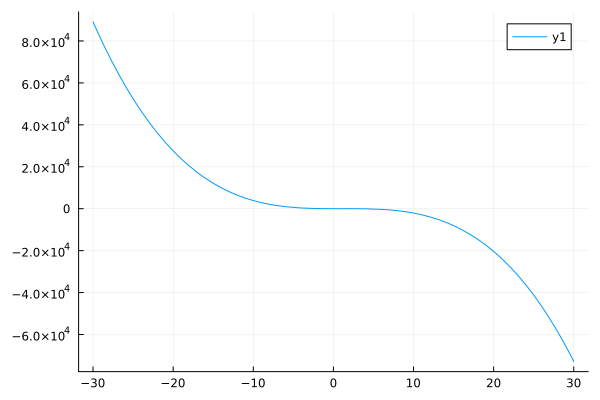

In [3]:
plot(g,-30,30)

In [4]:
@variables x
g(x)

2x + 9(x^2) - 3(x^3)

In [5]:
g′ = eval(
     build_function(Symbolics.derivative(g(x), x), x)
)
g′′ = eval(
     build_function(Symbolics.derivative(g′(x), x), x)
)

#3 (generic function with 1 method)

In [20]:
function newton_max_uni_a(f::Function, f′::Function, f′′::Function, x0, ϵ, maxit) 
    x1 = x0 
    
    for i in 1:maxit
        x1 = x1 - f′(x1)/f′′(x1)
    end
    return x1
end
newton_max_uni_a(g,g′,g′′,-10,1e-10,10000)

-0.10554159678513328

10


NaN

#### [Q2] Use the program to estimate $g(x)$. Use 0.99 and 1.01 as initial values, respectively. Do they converge to the same solution? Does the result indicate that initial values are important for Newton's methods? In light of this exercise, do you think the Newton's method is a local method or a global method?

#### [Q3] Use the program to estimate $g(x)$. Use 1.0 as the initial value.

 - [Q3.1] Why this initial value does not work for the program? Do you think that the problem arises because the function has an *inflection point* at $x=1.0$?

 
 - [Q3.2] The problem indicates that the program would fail when the function is not smoothly increasing or increasing. Modify your program such that it could get out of the situation and move on. The program should be named `newton_max_uni_a2`. When you implement the rescue plan, be sure to make use of the fact that the purpose of the program is to **maximize** a function. Use the function to find the maximizer of $g(x)$.

#### [Q4] Modify the above program to meet the following specifications

- Instead of requiring users to input analytic forms of the function's 1st and 2nd derivatives, use Julia's `ForwardDiff` to do it automatically. The program should be named `newton_max_uni_b`. The program should look like the following where the 1st and 2nd derivatives are calculated using `ForwardDiff` within the program. Estimate $g(x)$ using this program.

```julia
using ForwardDiff
function newton_max_uni_b(f::Function, x0, ϵ, imax)
    ....
end
```
Hint: `Forward.derivative()` is your friend. You need to find out how to use it to calculate the 2nd derivative.

### [Q5] Write a Julia program to implement Newton's method of finding the maximizers of a multi-variate function. The program should meet the following requirements:

- The program should be named `newton_max_a` (for ease of grading).


- The inputs should at least contain the following items:

```julia
function newton_max_a(f::Function, init, ϵ, maxit) 
   ...
end
```
   where `f` is the objective function, `init` is the vector of initial values, `ϵ` is the tolerance of convergence criterion, and `maxit` is the maximum number of iterations.
   

- The `f` is a function of `n` variables where `n` is larger than or equal to 1.
   

- Use `ForwardDiff` to calculate the gradient vector and the Hessian matrix.
  - Hint: `ForwardDiff.gradient()` and `ForwardDiff.hessian()`.


- Use the norm of the gradient as the basis to check convergence.
  - Hint: Google how to calculate the norm of a vector in Julia.


- The program should be able to check whether the found solution is a maximizer or a minimizer (hint: check whether the Hessian is positive definite or negative definite). If it is a minimizer instead of a maximizer, a warning should be issued.
  - Hint: Google how to check a matrix's definite using Julia.


- The program should print at least the following information: the solution, the number of iterations, and actual ϵ. If the number of iterations equals `maxit` (meaning, the estimation may not have converged), a warning should be issued.

#### [Q6] Use the program to estimate $h(x,y)$. Hint: Code the function as `h(x) = -(1.5 - x[1])^2 - 100*(x[2] - x[1]^2)^2` where `x` is a vector.


#### [Q7] Use the program to estimate $k(x,y)$. Hint: Code the function as `k(x) = - (x[1] + 2*x[2] - 7)^2 - (2*x[1] + x[2] -5)^2` where `x` is a vector. The estimation should converge in 1 iteration.



#### [Q8] Use the program to estimate $g(x)$. Hint: Code the function as `g(x) = -3*x[1]^3 + 9*x[1]^2 + 2*x[1]` where `x` is a vector.